In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict

C:\Users\Lucas\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_hdf('image_parameters_smd_reduced.hdf5') # loading the data

# making the labels
y = np.asarray(df.corsika_run_header_particle_id)
y[y == 14] = 0

# generating an array of features to feed into the random forest
size = np.asarray(df['size']) # because df.size actually returns the size of the dataframe...
width = np.asarray(df.width)
length = np.asarray(df.length)
num_islands = np.asarray(df.num_islands)
num_pixel_in_shower = np.asarray(df.num_pixel_in_shower)
X = np.vstack((size, width, length, num_islands, num_pixel_in_shower)).T

# Generating a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [3]:
n = np.array([1,10, 100])
for n_estimators in n:
    # Creating a random forest with sklearn:
    forest = RandomForestClassifier(n_estimators = n_estimators, max_depth = 2, random_state = 0)
    # Hinweis: sklearn.model_selection.cross_val_score ist in der Aufgabe angegeben.
    # Ich verstehe aber nicht, wie man das benutzt, daher erst mal so. Geht das besser?
    scores = cross_val_predict(forest,X_train,y_train,cv=5)
    print(roc_auc_score(y_train, scores))

0.5934884160001896
0.6193309381618546
0.6177769130763255


0.6587293137751618


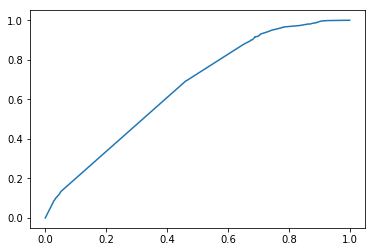

In [14]:
# Hier hatte ich nicht wirklich Ahnung, wie man das macht.
# Ich kann den Dokumentationen noch nicht hundertprozentig folgen...
forest = RandomForestClassifier(n_estimators = 10, max_depth = 2, random_state = 0)
forest.fit(X_train, y_train)
probas = forest.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:,1])
print(roc_auc_score(y_test, probas[:,1]))
plt.plot(fpr, tpr)
plt.show()